# Brain Stroke Dataset

<u><b>Loading Initial Libraries

### <u>Libraries

In [2]:
# Data manipulation libraries
import pandas as pd 
import numpy as np 

# Visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import os as swd
import matplotlib.ticker as mtick

<b><u>Importing and observing the dataset

In [3]:
data = pd.read_csv('E:/3rd year 2nd semester/ST3082-statistical learning/3rd Project/healthcare-dataset-stroke-data.csv')
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.drop(['id'],axis=1,inplace=True)
data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


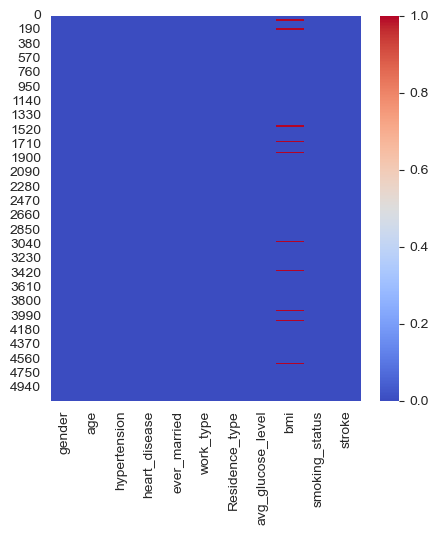

In [6]:
plt.figure(figsize = (5,5))
sns.heatmap(data.isnull(),cmap='coolwarm')
plt.show()

In [7]:
pwd

'C:\\Users\\ACER.LAPTOP-9LUK3RE6'

In [8]:
dir_path = swd.path.dirname('E:\\3rd year 2nd semester\\ST3082-statistical learning\\3rd Project')
print(dir_path)

E:\3rd year 2nd semester\ST3082-statistical learning


In [9]:
# create a list of categorical column names to one-hot encode
#cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
cat_cols = ['ever_married']
print(data[cat_cols].value_counts(normalize=False))

ever_married
Yes             3353
No              1757
dtype: int64


<b><u>Imputing missing values in 'bmi' using a regression tree</b>

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder

DT_bmi_pipe = Pipeline( steps=[ 
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])
X = data[['age','gender','ever_married','Residence_type','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
X.Residence_type = X.Residence_type.replace({'Urban':0,'Rural':1}).astype(np.uint8)
X.ever_married = X.ever_married.replace({'No':0,'Yes':1}).astype(np.uint8)
Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
DT_bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age','gender','ever_married','Residence_type']]),index=Missing.index)
data.loc[Missing.index,'bmi'] = predicted_bmi


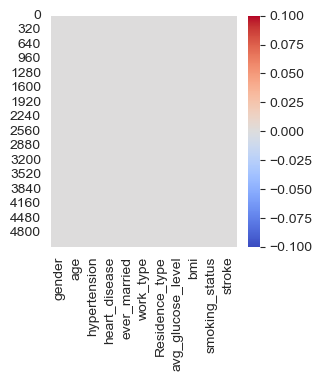

In [11]:
plt.figure(figsize = (3,3))
sns.heatmap(data.isnull(),cmap='coolwarm')
plt.show()

# <u>Exploratory Data Analysis 

## Univariate

#### <u> Response Variable : Percentage of People Having Strokes

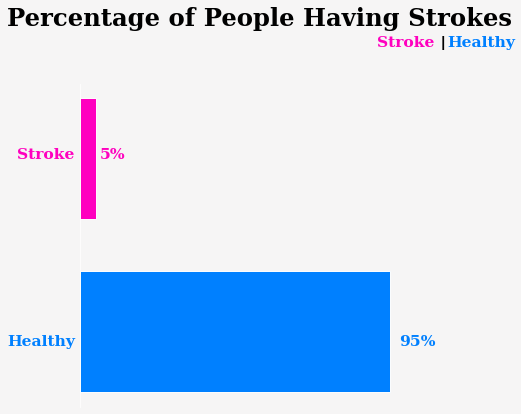

In [12]:
x = pd.DataFrame( data.groupby(['stroke'])['stroke'].count())
# plot
fig, ax = plt.subplots(figsize = (6,6), dpi = 70)
ax.barh([1], x.stroke[1], height = 0.7, color = '#ff00bf')
plt.text(-1150,-0.08, 'Healthy',{'font': 'Serif','weight':'bold','size': 16,'style':'normal', 'color':"#0080ff"})
plt.text(5000,-0.08, '95%',{'font':'Serif','weight':'bold' ,'size':16,'color':"#0080ff"})
ax.barh([0], x.stroke[0], height = 0.7, color = "#0080ff")
plt.text(-1000,1, 'Stroke', {'font': 'Serif','weight':'bold','size': 16,'style':'normal', 'color':'#ff00bf'})
plt.text(300,1, '5%',{'font':'Serif', 'weight':'bold','size':'16','color':'#ff00bf'})
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

plt.text(-1150,1.77, 'Percentage of People Having Strokes' ,{'font': 'Serif', 'size': '25','weight':'bold', 'color':'black'})
plt.text(4650,1.65, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#ff00bf'})
plt.text(5650,1.65, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
plt.text(5750,1.65, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':"#0080ff"})
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#### <u>Categorical variables distribtion

#### <u>Numeric/continuous variable distribtion

###### 1)Age distribution

Text(-17, 0.025, 'Overall Age Distribution ')

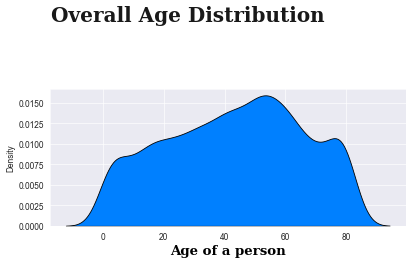

In [13]:
fig = plt.figure(figsize = (24,10), dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)


ax2 = fig.add_subplot(gs[1:4,0:8]) #distribution plot

sns.kdeplot(data = data, x = 'age', ax = ax2, shade = True, color = "#0080ff", alpha = 1,ec='black')
ax2.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(-17,0.025,'Overall Age Distribution ', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)

###### 2)Avg Gluicose Level

Text(-17, 0.025, 'Overall Avg. Glucose Levels Distribution ')

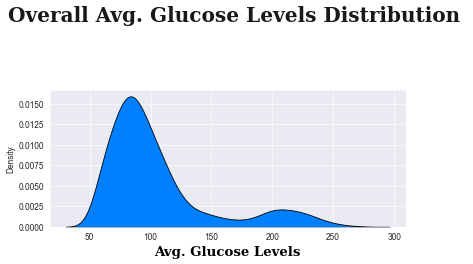

In [14]:
fig = plt.figure(figsize = (24,10), dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)


ax2 = fig.add_subplot(gs[1:4,0:8]) #distribution plot

sns.kdeplot(data = data, x = 'avg_glucose_level', ax = ax2, shade = True, color = "#0080ff", alpha = 1, ec='black' )
ax2.set_xlabel('Avg. Glucose Levels', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(-17,0.025,'Overall Avg. Glucose Levels Distribution ', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)

###### 2)BMI

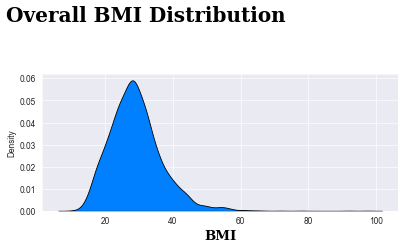

In [123]:
fig = plt.figure(figsize=(24, 10), dpi=60)
gs = fig.add_gridspec(10, 24)
gs.update(wspace=1, hspace=0.05)

ax2 = fig.add_subplot(gs[1:4, 0:8]) #distribution plot
sns.kdeplot(data=data, x='bmi', ax=ax2, shade=True, color="#0080ff", alpha=1, ec='black')
ax2.set_xlabel('BMI', fontdict={'font': 'Serif', 'color': 'black', 'size': 16, 'weight': 'bold'})

fig.text(0.1, 0.9, 'Overall BMI Distribution', fontdict={'font': 'Serif', 'color': 'black', 'weight': 'bold', 'size': 24}, va='center', ha='left')

plt.show()

  ## Bivariabte

#### <u>Numeric/continuous variableS

###### 1)Age - Stroke

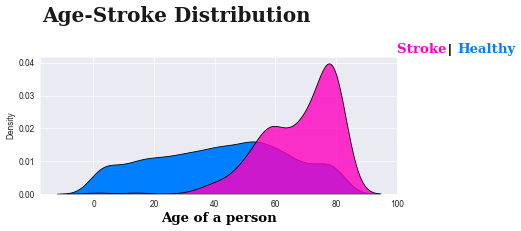

In [16]:
fig = plt.figure(figsize = (24,10), dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)

ax3 = fig.add_subplot(gs[6:9, 0:8]) #hue distribution plot
sns.kdeplot(data = data[data['stroke'] == 0], x = 'age',ax = ax3, shade = True,  alpha = 1, color = "#0080ff", ec='black' )
sns.kdeplot(data = data[data['stroke'] == 1], x = 'age',ax = ax3, shade = True,  alpha = 0.8, color = "#ff00bf", ec='black')

ax3.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax3.text(-17,0.0525,'Age-Stroke Distribution', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)
ax3.text(100,0.043, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#ff00bf'})
ax3.text(117,0.043, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax3.text(120,0.043, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':"#0080ff"})
plt.show()


###### 2)Avg Glucose Level - Stroke

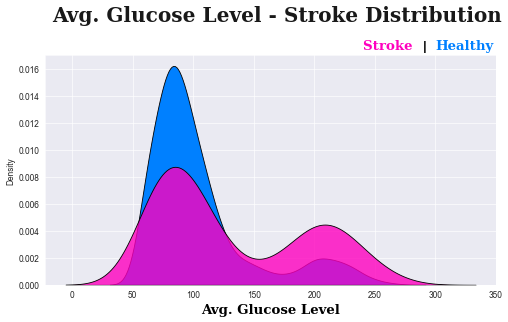

In [17]:
fig = plt.figure(figsize = (24,10), dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)

ax3 = fig.add_subplot(gs[5:10, 0:10]) #hue distribution plot
sns.kdeplot(data = data[data['stroke'] == 0], x = "avg_glucose_level",ax = ax3, shade = True,  alpha = 1, color = "#0080ff", ec='black' )
sns.kdeplot(data = data[data['stroke'] == 1], x = "avg_glucose_level",ax = ax3, shade = True,  alpha = 0.8, color = "#ff00bf", ec='black')

ax3.set_xlabel('Avg. Glucose Level', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax3.text(-17,0.0195,'Avg. Glucose Level - Stroke Distribution', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)
ax3.text(240,0.0174,  'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#ff00bf'})
ax3.text(290,0.0174, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax3.text(300,0.0174,'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':"#0080ff"})
plt.show()


###### 2)BMI - Stroke

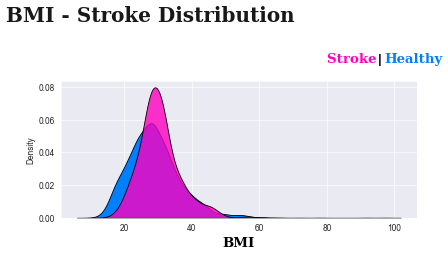

In [18]:
fig = plt.figure(figsize = (24,10), dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)

ax3 = fig.add_subplot(gs[6:9, 0:8]) #hue distribution plot
sns.kdeplot(data = data[data['stroke'] == 0], x = "bmi",ax = ax3, shade = True,  alpha = 1, color = "#0080ff", ec='black' )
sns.kdeplot(data = data[data['stroke'] == 1], x = "bmi",ax = ax3, shade = True,  alpha = 0.8, color = "#ff00bf", ec='black')

ax3.set_xlabel('BMI', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax3.text(-15,0.12,'BMI - Stroke Distribution', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)
ax3.text(80,0.095,  'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#ff00bf'})
ax3.text(95,0.095, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax3.text(97,0.095,'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':"#0080ff"})
plt.show()


#### <u>Categorical variables

###### 1)hypertention- Stroke (do not use this)

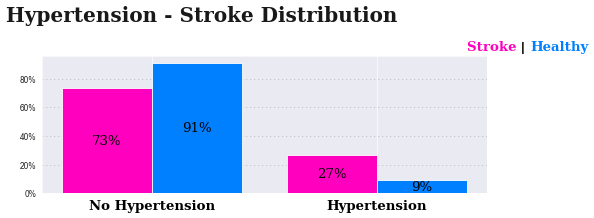

In [119]:
str_only = data[data['stroke'] == 1]
no_str_only = data[data['stroke'] == 0]

fig = plt.figure(figsize = (30,10), dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)

ax8 = fig.add_subplot(gs[6:9, 0:8])

positive = pd.DataFrame(str_only["hypertension"].value_counts())
positive["Percentage"] = positive["hypertension"].apply(lambda x: x/sum(positive["hypertension"])*100)
negative = pd.DataFrame(no_str_only["hypertension"].value_counts())
negative["Percentage"] = negative["hypertension"].apply(lambda x: x/sum(negative["hypertension"])*100)

x = np.arange(len(positive))
ax8.text(-0.45, 120,'Hypertension - Stroke Distribution', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)
ax8.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax8.bar(x, height=positive["Percentage"], zorder=3, color= '#ff00bf', width=0.4)
ax8.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#0080ff", width=0.4)
ax8.set_xticks(x + 0.4 / 2)
ax8.set_xticklabels(['No Hypertension','Hypertension'],fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})
ax8.yaxis.set_major_formatter(mtick.PercentFormatter())
ax8.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1], positive["Percentage"]):
    ax8.annotate(f'{j:0.0f}%',xy=(i, j/2), color='black', size=16 ,font='Serif',horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax8.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='black',size=16 ,font='Serif', horizontalalignment='center', verticalalignment='center')

ax8.text(1.6, 100, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'#ff00bf'})
ax8.text(1.84, 100, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax8.text(1.88, 100,'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'color':"#0080ff"})
   
    
plt.show()

    

In [20]:
#27% of people who have stroke also have Hypertension
#while only 9% of people who do not have stroke have hypertention

###### 1)Hypertention- Stroke

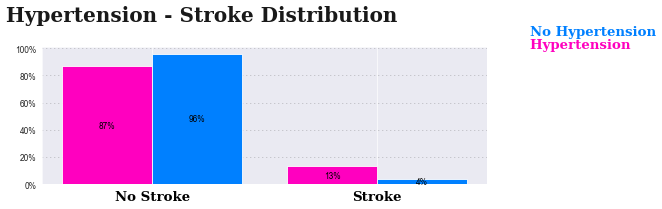

Text(0, 0.5, 'Precentage')

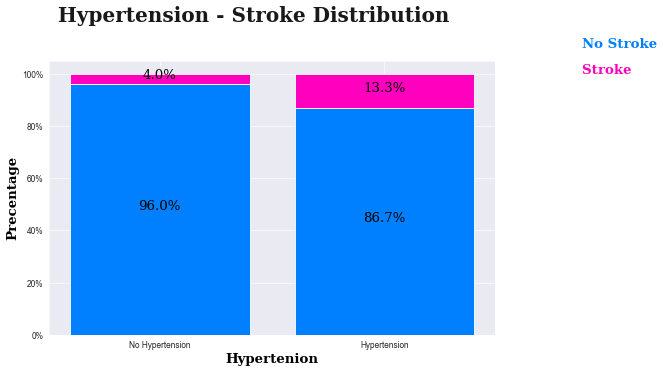

In [116]:
have_hyper = data[data['hypertension'] == 1]
donot_have_hyper = data[data['hypertension'] == 0]

fig = plt.figure(figsize = (30,10), dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)

ax8 = fig.add_subplot(gs[6:9, 0:8])

positive = pd.DataFrame(have_hyper["stroke"].value_counts())
positive["Percentage"] = positive["stroke"].apply(lambda x: x/sum(positive["stroke"])*100)
negative = pd.DataFrame(donot_have_hyper["stroke"].value_counts())
negative["Percentage"] = negative["stroke"].apply(lambda x: x/sum(negative["stroke"])*100)

x = np.arange(len(positive))
ax8.text(-0.45, 120,'Hypertension - Stroke Distribution', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)
ax8.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax8.bar(x, height=positive["Percentage"], zorder=3, color= '#ff00bf', width=0.4)
ax8.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#0080ff", width=0.4)
ax8.set_xticks(x + 0.4 / 2)
ax8.set_xticklabels(['No Stroke','Stroke'],fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})
ax8.yaxis.set_major_formatter(mtick.PercentFormatter())
ax8.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1], positive["Percentage"]):
    ax8.annotate(f'{j:0.0f}%',xy=(i, j/2),color='black', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax8.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='black', horizontalalignment='center', verticalalignment='center')

ax8.text(1.88, 100, 'Hypertension ', {'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'#ff00bf'})
ax8.text(1.88, 110,'No Hypertension', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'color':"#0080ff"})
   
    
plt.show()


########################################### 2nd graph
stroke_hyper = data[data['stroke'] == 1]['hypertension'].value_counts()
healthy_hyper = data[data['stroke'] == 0]['hypertension'].value_counts()

no = data['hypertension'].value_counts().values[0]
yes =  data['hypertension'].value_counts().values[1]

stroke_no = stroke_hyper.values[0] / no * 100
stroke_yes = stroke_hyper.values[1] / yes * 100
healthy_no = healthy_hyper.values[0] / no * 100
healthy_yes = healthy_hyper.values[1] / yes * 100

no_per = no / (no+yes) * 100
yes_per = yes / (no+yes) * 100

groups = ['No Hypertension', 'Hypertension']
values1 = [healthy_no , healthy_yes]
values2 = [stroke_no, stroke_yes]

fig = plt.figure(figsize = (30,20), dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)

ax = fig.add_subplot(gs[6:9, 0:8])
ax.text(-0.45, 120,'Hypertension - Stroke Distribution', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)

# Stacked bar chart
ax.bar(groups, values1, color='#0080ff')
ax.bar(groups, values2, bottom = values1, color='#ff00bf')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_locator(mtick.MultipleLocator(20))

# Labels
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() / 2 + bar.get_y(),
            str(round(bar.get_height(), 1)) + '%',  # Add percentage symbol to the label
            ha='center', color='black',  size=16 ,font='Serif')

ax.text(1.88, 100, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'#ff00bf'})
ax.text(1.88, 110,'No Stroke', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'color':"#0080ff"})
ax.set_xlabel('Hypertenion', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})
ax.set_ylabel('Precentage', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})


# plt.show() 

In [22]:
#if you have hypertention 13% to stoke 
#No hypertention only 4% stroke 

###### 2)Heart Disease- Stroke

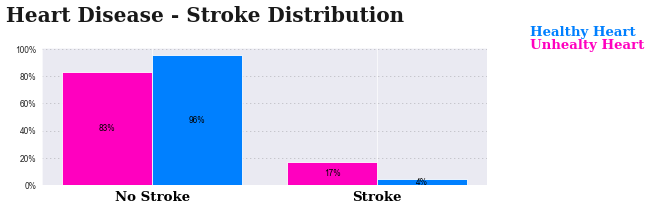

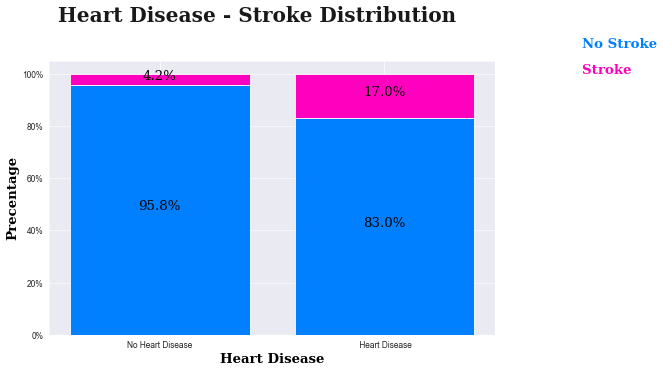

In [120]:
Unhelthy_heart = data[data['heart_disease'] == 1]
Healthy_heart = data[data['heart_disease'] == 0]

fig = plt.figure(figsize = (30,10), dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)

ax8 = fig.add_subplot(gs[6:9, 0:8])

positive = pd.DataFrame(Unhelthy_heart["stroke"].value_counts())
positive["Percentage"] = positive["stroke"].apply(lambda x: x/sum(positive["stroke"])*100)
negative = pd.DataFrame(Healthy_heart ["stroke"].value_counts())
negative["Percentage"] = negative["stroke"].apply(lambda x: x/sum(negative["stroke"])*100)

x = np.arange(len(positive))
ax8.text(-0.45, 120,'Heart Disease - Stroke Distribution', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)
ax8.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax8.bar(x, height=positive["Percentage"], zorder=3, color= '#ff00bf', width=0.4)
ax8.bar(x+0.4, height=negative["Percentage"], zorder=3, color="#0080ff", width=0.4)
ax8.set_xticks(x + 0.4 / 2)
ax8.set_xticklabels(['No Stroke','Stroke'],fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})
ax8.yaxis.set_major_formatter(mtick.PercentFormatter())
ax8.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1], positive["Percentage"]):
    ax8.annotate(f'{j:0.0f}%',xy=(i, j/2),color='black', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], negative["Percentage"]):
    ax8.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='black', horizontalalignment='center', verticalalignment='center')

ax8.text(1.88, 100, 'Unhealty Heart ', {'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'#ff00bf'})
ax8.text(1.88, 110,'Healthy Heart', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'color':"#0080ff"})
   
    
plt.show()

#################################### 2ND PLOT
stroke_heart = data[data['stroke'] == 1]['heart_disease'].value_counts()
healthy_heart = data[data['stroke'] == 0]['heart_disease'].value_counts()

no = data['heart_disease'].value_counts().values[0]
yes =  data['heart_disease'].value_counts().values[1]

stroke_no = stroke_heart.values[0] / no * 100
stroke_yes = stroke_heart.values[1] / yes * 100
healthy_no = healthy_heart.values[0] / no * 100
healthy_yes = healthy_heart.values[1] / yes * 100

no_per = no / (no+yes) * 100
yes_per = yes / (no+yes) * 100

groups = ['No Heart Disease', ' Heart Disease']
values1 = [healthy_no , healthy_yes]
values2 = [stroke_no, stroke_yes]

fig = plt.figure(figsize = (30,20), dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)

ax = fig.add_subplot(gs[6:9, 0:8])
ax.text(-0.45, 120,'Heart Disease - Stroke Distribution', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)

# Stacked bar chart
ax.bar(groups, values1, color='#0080ff')
ax.bar(groups, values2, bottom = values1, color='#ff00bf')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_locator(mtick.MultipleLocator(20))

# Labels
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() / 2 + bar.get_y(),
            str(round(bar.get_height(), 1)) + '%',  # Add percentage symbol to the label
            ha='center', color='black',size=16 ,font='Serif')

ax.text(1.88, 100, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'#ff00bf'})
ax.text(1.88, 110,'No Stroke', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'color':"#0080ff"})
ax.set_xlabel('Heart Disease', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})
ax.set_ylabel('Precentage', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})


plt.show() 

In [24]:
#Unhealthy heart 17% have stroke
#healthy heart only 4% stroke

###### 3)Smoking status- Stroke

Text(0, 0.5, 'Precentage')

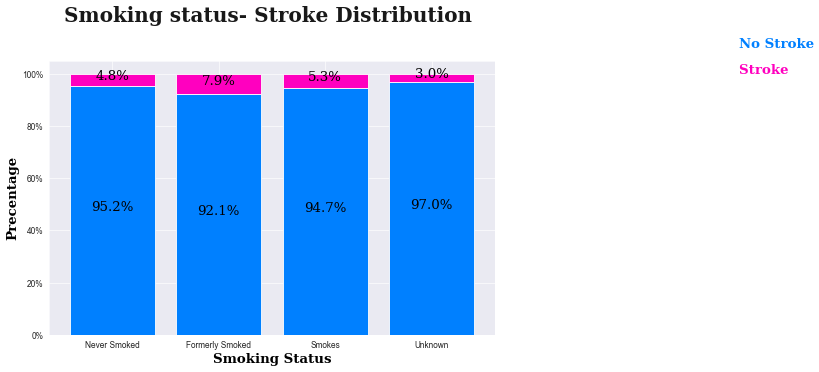

In [125]:
smoke = data['smoking_status'].value_counts()
stroke_smoke = data[data['stroke'] == 1]['smoking_status'].value_counts()
healthy_smoke = data[data['stroke'] == 0]['smoking_status'].value_counts()

never = smoke.values[0]
unknown =  smoke.values[1]
former = smoke.values[2]
smokes = smoke.values[3]

stroke_never = stroke_smoke.values[0] / never * 100
stroke_unknown = stroke_smoke.values[2]  / unknown *100
stroke_former = stroke_smoke.values[1]  / former * 100
stroke_smokes = stroke_smoke.values[3]  / smokes *100

healthy_never = healthy_smoke.values[0] / never * 100
healthy_unknown = healthy_smoke.values[1] / unknown *100
healthy_former = healthy_smoke.values[2] / former * 100
healthy_smokes = healthy_smoke.values[3]/ smokes *100


never_per = never/(never+unknown+former+smokes) * 100
unknown_per = unknown/(never+unknown+former+smokes)* 100
former_per = former/(never+unknown+former+smokes) * 100
smokes_per = smokes/(never+unknown+former+smokes)* 100


groups = ['Never Smoked', 'Formerly Smoked','Smokes','Unknown']
values1 = [healthy_never ,healthy_former,healthy_smokes,healthy_unknown]
values2 = [stroke_never ,stroke_former,stroke_smokes,stroke_unknown]

fig = plt.figure(figsize = (30,20), dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)

ax = fig.add_subplot(gs[6:9, 0:8])
ax.text(-0.45, 120,'Smoking status- Stroke Distribution', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)

# Stacked bar chart
ax.bar(groups, values1, color='#0080ff')
ax.bar(groups, values2, bottom = values1, color='#ff00bf')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_locator(mtick.MultipleLocator(20))

# Labels
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() / 2 + bar.get_y(),
            str(round(bar.get_height(), 1)) + '%',  # Add percentage symbol to the label
            ha='center', color='black',size=16 ,font='Serif')

ax.text(5.88, 100, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'#ff00bf'})
ax.text(5.88, 110,'No Stroke', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'color':"#0080ff"})
ax.set_xlabel('Smoking Status', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})
ax.set_ylabel('Precentage', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})


###### 3)Work Type- Stroke

Text(0, 0.5, 'Precentage')

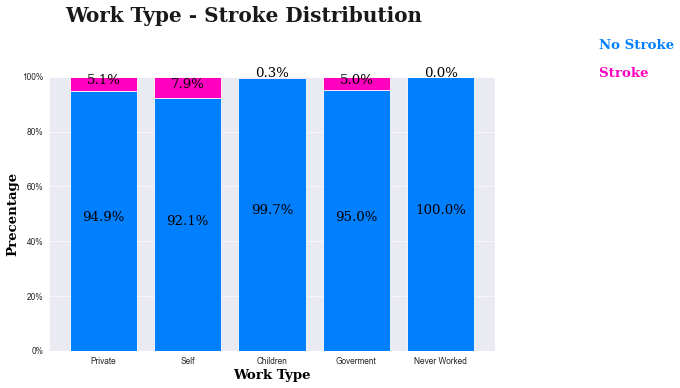

In [121]:
work = data['work_type'].value_counts()
stroke_work = data[data['stroke'] == 1]['work_type'].value_counts()
healthy_work = data[data['stroke'] == 0]['work_type'].value_counts()

private = work.values[0]
self =  work.values[1]
child = work.values[2]
gov = work.values[3]
never = work.values[4]

stroke_private = stroke_work.values[0] / private * 100
stroke_self = stroke_work.values[1]  / self *100
stroke_child = stroke_work.values[3]  / child * 100
stroke_gov = stroke_work.values[2]  / gov *100
stroke_never = 0

healthy_private = healthy_work.values[0] / private * 100
healthy_self = healthy_work.values[1] / self *100
healthy_child = healthy_work.values[2] / child * 100
healthy_gov = healthy_work.values[3]/ gov *100
healthy_never = healthy_work.values[4]/ never *100

private_per =private/(private+self+child+gov+never) * 100
self_per = self/(private+self+child+gov+never)* 100
child_per =child/(private+self+child+gov+never) * 100
gov_per = gov/(private+self+child+gov+never)* 100
never_per =never/(private+self+child+gov+never)* 100


groups = ['Private', 'Self','Children','Goverment','Never Worked']
values1 = [healthy_private ,healthy_self,healthy_child,healthy_gov,healthy_never]
values2 = [stroke_private,stroke_self,stroke_child,stroke_gov,stroke_never]

fig = plt.figure(figsize = (30,20), dpi = 60)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)

ax = fig.add_subplot(gs[6:9, 0:8])
ax.text(-0.45, 120,'Work Type - Stroke Distribution', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)

# Stacked bar chart
ax.bar(groups, values1, color='#0080ff')
ax.bar(groups, values2, bottom = values1, color='#ff00bf')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_locator(mtick.MultipleLocator(20))

# Labels
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() / 2 + bar.get_y(),
            str(round(bar.get_height(), 1)) + '%',  # Add percentage symbol to the label
            ha='center', color='black',size=16 ,font='Serif')

ax.text(5.88, 100, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'#ff00bf'})
ax.text(5.88, 110,'No Stroke', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'color':"#0080ff"})
ax.set_xlabel('Work Type', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})
ax.set_ylabel('Precentage', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})


In [218]:
data_onehot=data.copy()
data_onehot = pd.get_dummies(data_onehot, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])


In [219]:
data_onehot.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,NaN,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [221]:
from sklearn.model_selection import train_test_split

np.random.seed(42)  # set the random seed for reproducibility

X = data_onehot.drop(['stroke'], axis=1)
y = data_onehot['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [222]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler

# Separate the features and target variable
X = data_onehot.drop('stroke', axis=1)
y = data_onehot['stroke']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PLS regression
pls = PLSRegression(n_components=2)
pls.fit(X_scaled, y)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

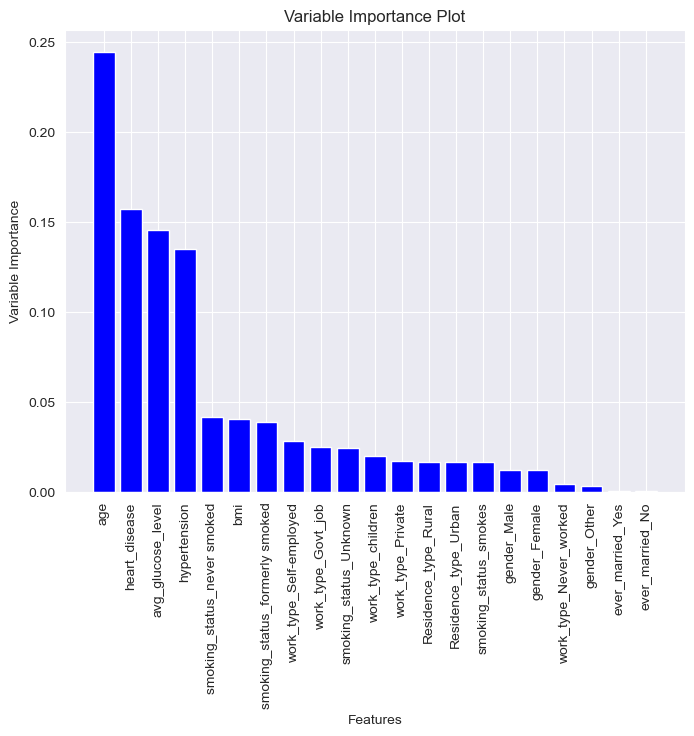

In [57]:
# Calculate the variable importance scores
vip = np.abs(pls.coef_).sum(axis=1)

# Normalize the scores
vip /= vip.sum()

# Sort the scores in descending order and get the corresponding feature names
sorted_idx = vip.argsort()[::-1]
sorted_features = X.columns[sorted_idx]

# Plot the scores
plt.figure(figsize=(8, 6))
plt.bar(sorted_features, vip[sorted_idx], color='b')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Variable Importance')
plt.title('Variable Importance Plot')
plt.show()


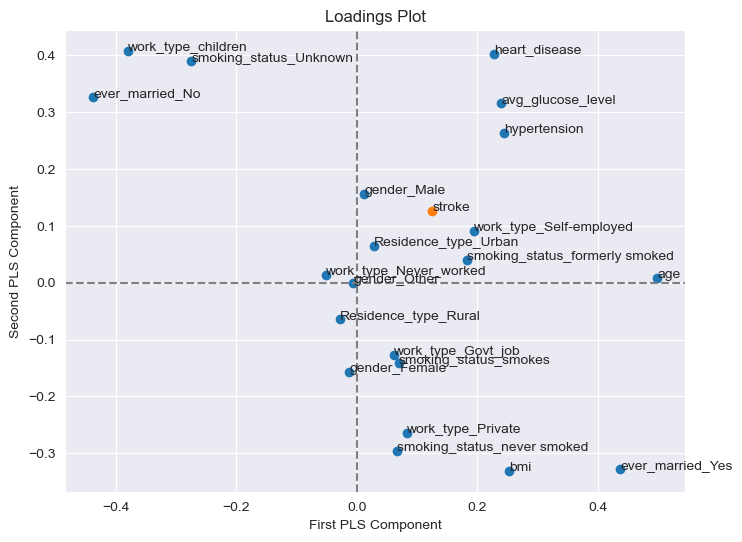

In [55]:
# Plot the loadings for the input features
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(pls.x_loadings_[:, 0], pls.x_loadings_[:, 1])
plt.scatter(pls.y_loadings_[:, 0], pls.y_loadings_[:, 1])
plt.xlabel('First PLS Component')
plt.ylabel('Second PLS Component')
plt.title('Loadings Plot')
for i, var in enumerate(X.columns):
    plt.annotate(var, (pls.x_loadings_[i, 0], pls.x_loadings_[i, 1]))
plt.annotate('stroke', (pls.y_loadings_[0, 0], pls.y_loadings_[0, 1]))

ax.axhline(y=0, linestyle='--', color='gray')
ax.axvline(x=0, linestyle='--', color='gray')
plt.show()


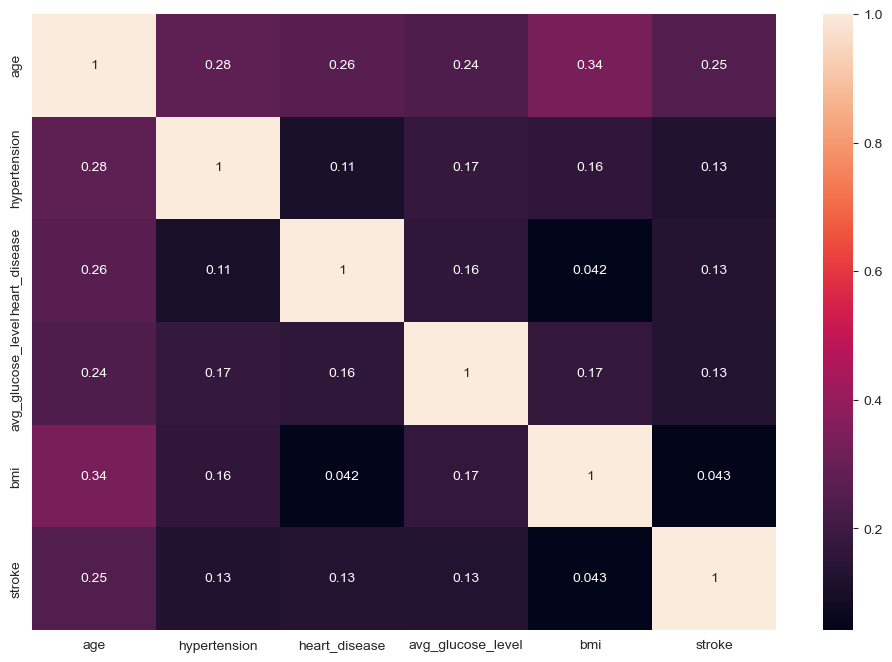

In [129]:

plt.figure(figsize=(12,8))
ax = sns.heatmap(data.corr(), annot=True)
plt.show()